In [18]:
import numpy as np
import matplotlib.pyplot as plt
import gpxpy as gp
import pandas as pd
import geopandas as gpd
import seaborn as sns
import contextily as ctx

from shapely.geometry import Point
from pyproj import Proj, Transformer

In [2]:
gpx_file = open('/home/armitage/Downloads/Plateau_Saclay.gpx', 'r')
gpx = gp.parse(gpx_file)

In [3]:
speed = []
time = []
longitude = []
latitude = []

for track in gpx.tracks:
  for segment in track.segments:
    for point_no, point in enumerate(segment.points):
      if point.speed != None:
        print('Speed = {}'.format(point.speed))
      elif point_no > 0:
        speed.append(point.speed_between(segment.points[point_no - 1]))
        time.append(point.time)
        longitude.append(point.longitude)
        latitude.append(point.latitude)

In [4]:
df = pd.DataFrame({'time': time, 'speed': speed})
df['speed'] = df['speed'] * 60 * 60 / 1e3
df['time'] = df['time'].dt.tz_localize(None)
df = df.set_index('time')

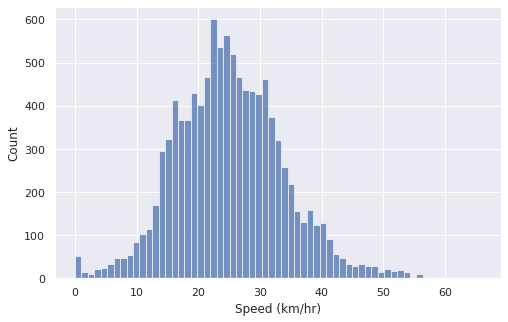

In [5]:
sns.set(rc={'figure.figsize':(8, 5)})
sns.histplot(data=df, x='speed')
plt.xlabel('Speed (km/hr)')
plt.savefig('speed-distr.png', dpi=300)
plt.show()

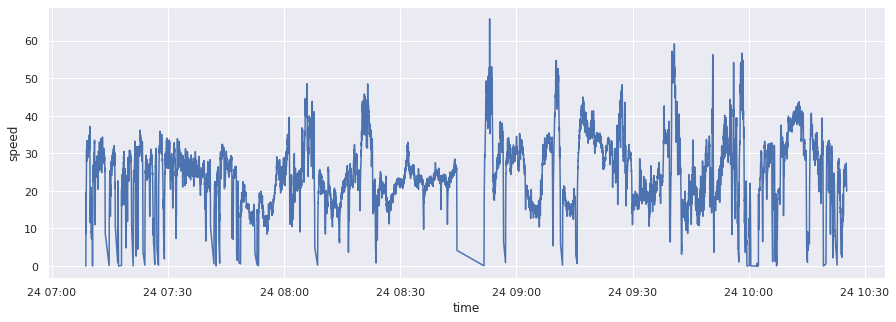

In [6]:
sns.set(rc={'figure.figsize':(15, 5)})
sns.lineplot(data=df['speed'])
plt.show()

In [20]:
transformer = Transformer.from_crs('epsg:4326', 'epsg:3857')
x, y = transformer.transform(latitude, longitude)
df['coordinates'] = list(zip(x, y))
df['coordinates'] = df['coordinates'].apply(Point)

In [21]:
gdf = gpd.GeoDataFrame(df, geometry='coordinates')

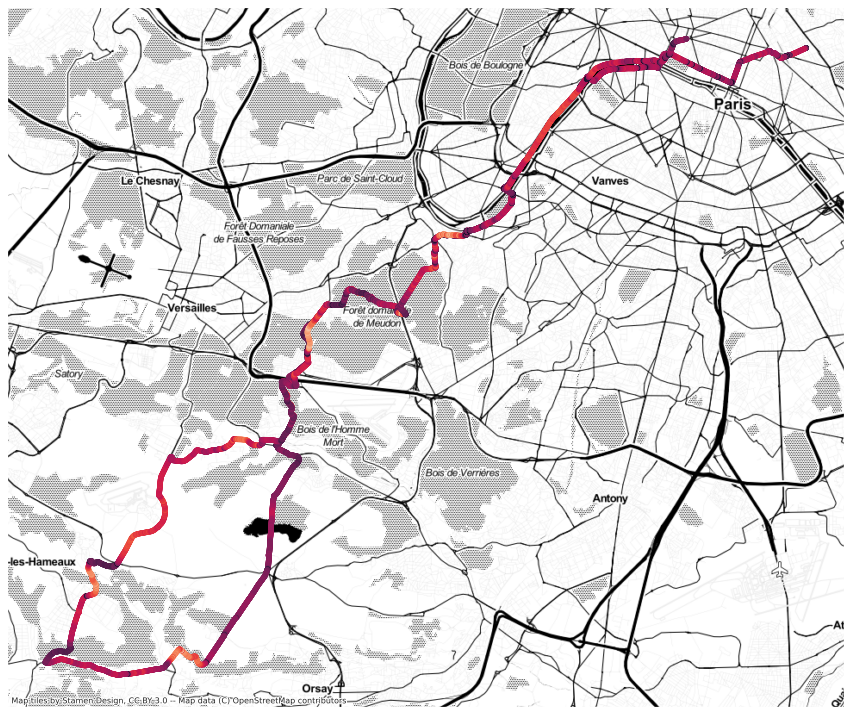

In [37]:
ax = gdf.plot(figsize=[15,15], c=gdf['speed'], markersize=20, legend=True)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ctx.add_basemap(ax, source=ctx.providers.Stamen.Toner)
plt.savefig('map.png', dpi=300)
plt.show()